In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from dateutil.parser import parse as parse_time

In [3]:
run_root = Path('../runs')

In [4]:
def plot(run):
    rows = []
    with open(str(run_root / run / 'train.log')) as fh:
        for stp in [l.strip() for l in fh.readlines()]:
            rows.append(eval(stp))
            
    elpased = parse_time(rows[-1]['dt']) - parse_time(rows[0]['dt'])

    train_loss = np.vstack([(r['step'], r['loss']) for r in rows if 'loss' in r])
    valid_loss = np.vstack([(r['step'], r['valid_loss']) for r in rows if 'valid_loss' in r])
    lr = np.vstack([(r['step'], r['lr']) for r in rows if 'lr' in r])
    score = np.vstack([(r['step'], r['score']) for r in rows if 'score' in r])
    
    print('Time {}'.format(elpased))
    
    best_score = np.max(score[:, 1])
    best_valid_loss = np.min(valid_loss[:, 1])
    print('Best score {:4f}'.format(best_score))
    print('Best valid loss {:4f}'.format(best_valid_loss))

    plt.figure(figsize=(16,8))
    plt.plot(train_loss[:,0], train_loss[:,1])
    plt.plot(valid_loss[:,0], valid_loss[:,1])
    plt.hlines(best_valid_loss, 0, np.max(valid_loss[-1, 0]))
    plt.grid()
    plt.legend(['train loss', 'valid loss', 'lr'])
    plt.title(run)

    plt.figure(figsize=(8,4))
    plt.plot(score[:,0], score[:,1])
    plt.hlines(best_score, 0, np.max(score[-1, 0]))
    plt.grid()
    plt.title('score')
    
    plt.figure(figsize=(8,4))
    plt.plot(lr[:,0], lr[:,1], 'o')
    plt.grid()
    plt.title('lr')

In [7]:
!ls -l ../runs

total 28
drwxrwxr-x 2 ali ali 4096 фев  5 11:58 densenet121_input_512
drwxrwxr-x 2 ali ali 4096 фев  5 17:30 densenet121_input_512_clean_flickr_sw
drwxrwxr-x 2 ali ali 4096 фев  6 01:37 densenet121_+reviews_adam_new_classif
drwxrwxr-x 2 ali ali 4096 фев  6 15:22 densenet169_ismanip
drwxrwxr-x 2 ali ali 4096 фев  6 15:43 densenet_ismanip
drwxrwxr-x 2 ali ali 4096 фев  7 02:32 resnet151_ismanip
drwxrwxr-x 2 ali ali 4096 фев  7 09:06 resnet50_ismanip


Time 10:54:24.129848
Best score 0.984372
Best valid loss 0.068371


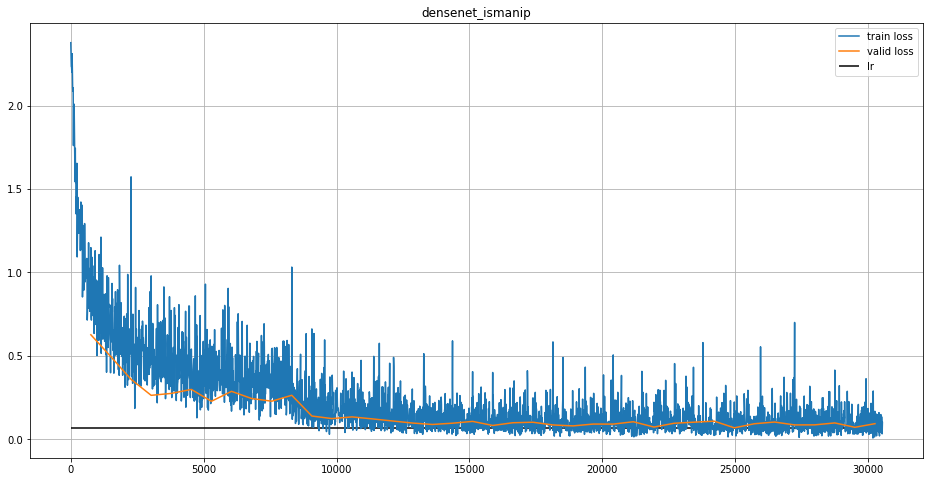

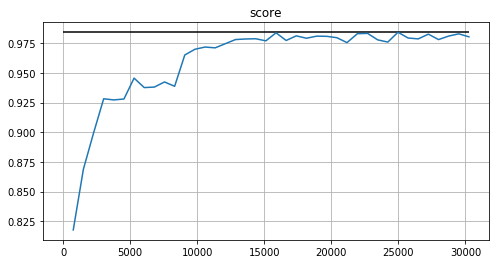

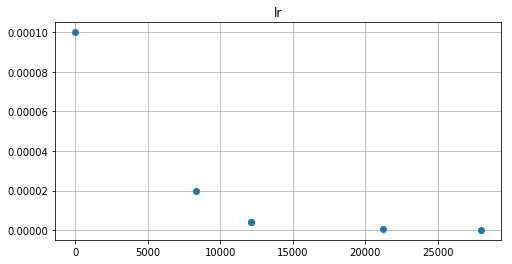

In [6]:
plot('densenet_ismanip')

Time 6:32:00.679773
Best score 0.981265
Best valid loss 0.101954


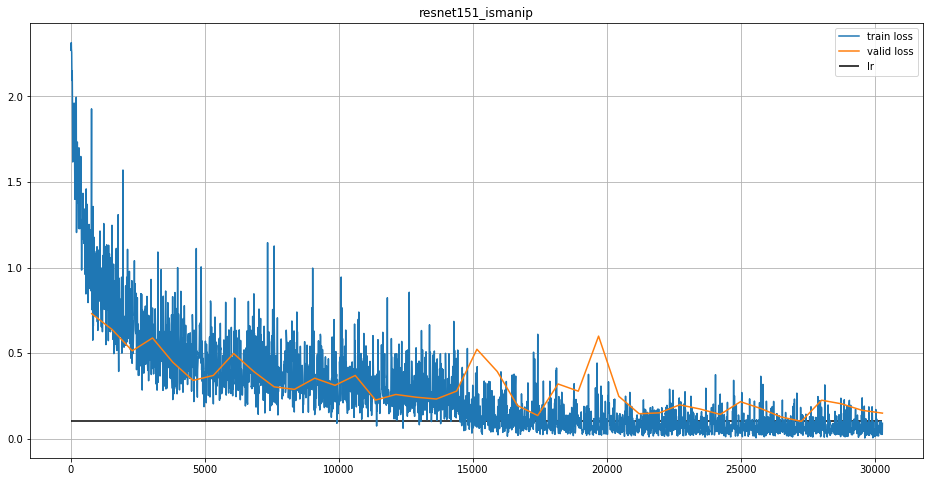

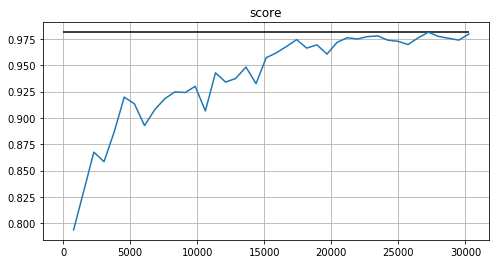

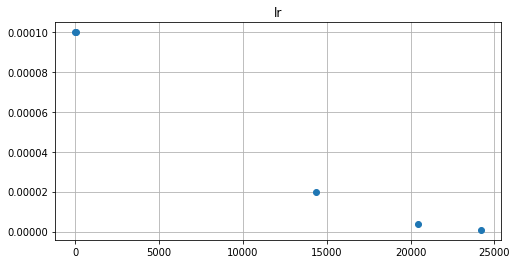

In [8]:
plot('resnet151_ismanip')

Time 5:10:55.433356
Best score 0.984786
Best valid loss 0.079992


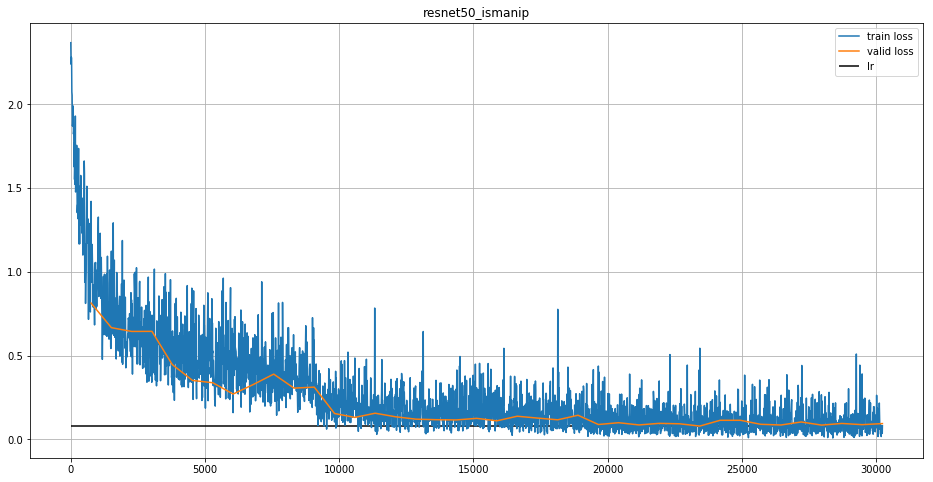

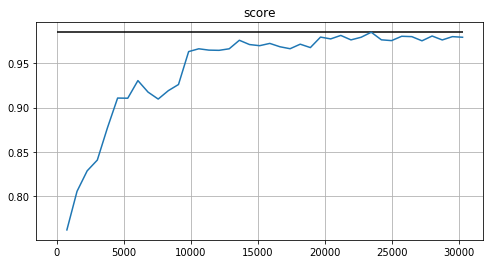

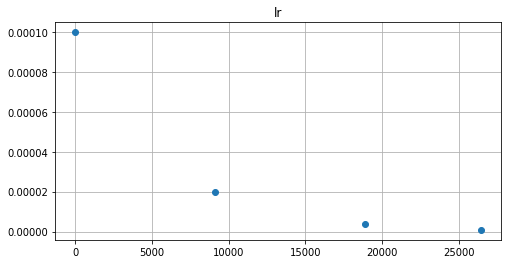

In [11]:
plot('resnet50_ismanip')

Time 12:01:01.627391
Best score 0.982801
Best valid loss 0.080071


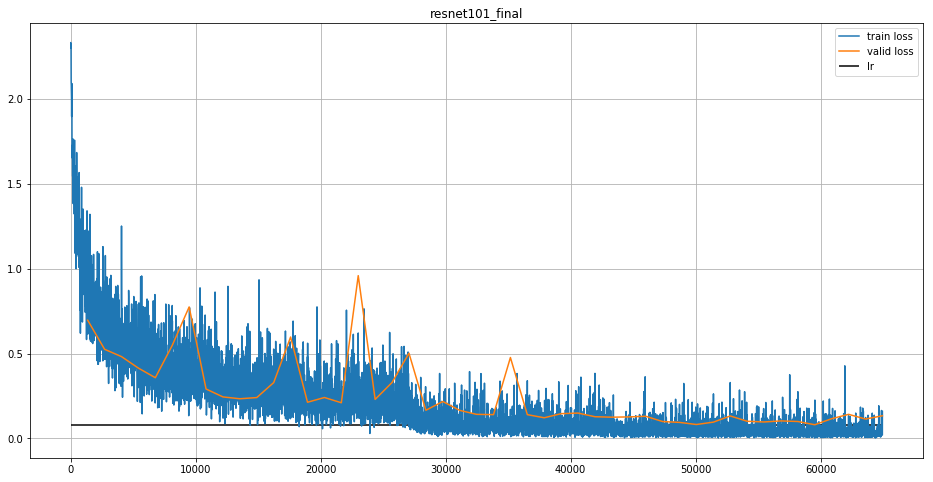

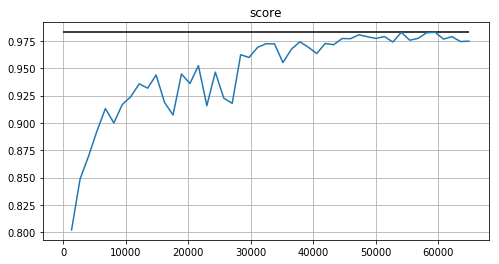

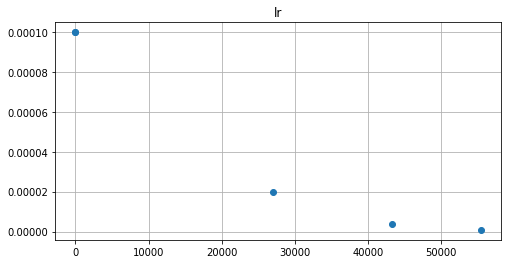

In [10]:
plot('resnet101_final')

Time 6:47:20.476325
Best score 0.982052
Best valid loss 0.090003


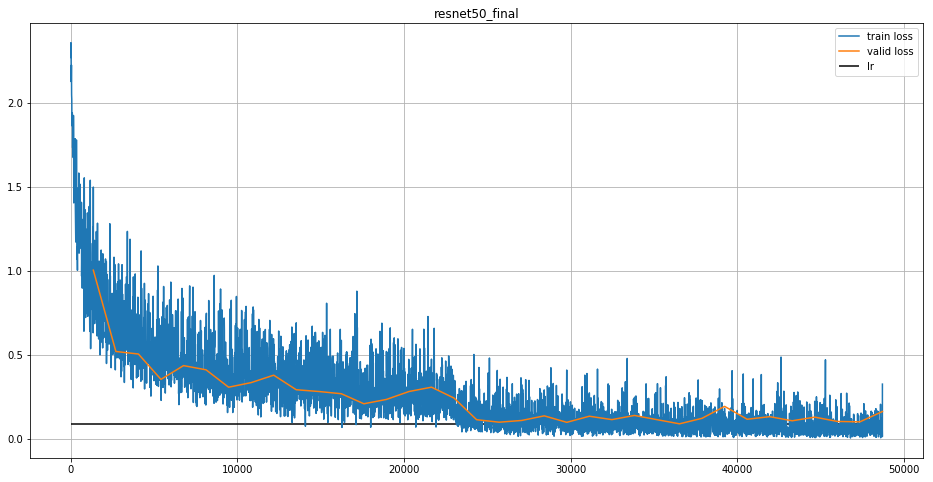

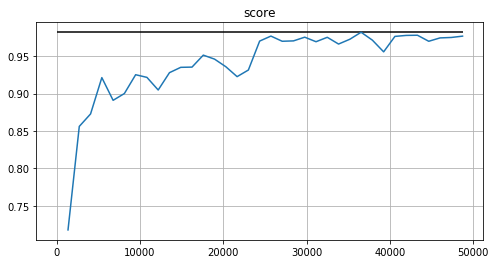

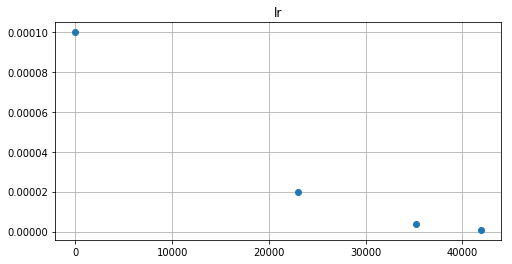

In [13]:
plot('resnet50_final')